# Laboratory work #10 Decision Tree Regression

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In this work your goal is to get yourself familiar with Decision Tree Regression and Random Forest Regression.

You can collaborate with your teammate to complete this laboratory work - in a team of 2 students.

## Task 1 Introduction
1. Create a team of two students and choose a dataset suitable for regression task. You can use www.kaggle.com or any similar resources of datasets. 
2. Describe you dataset - what kind of information does it contain, what are the features, what is the target value?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Breast_cancer_data.csv')
# df = pd.read_csv('data.csv')
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [3]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


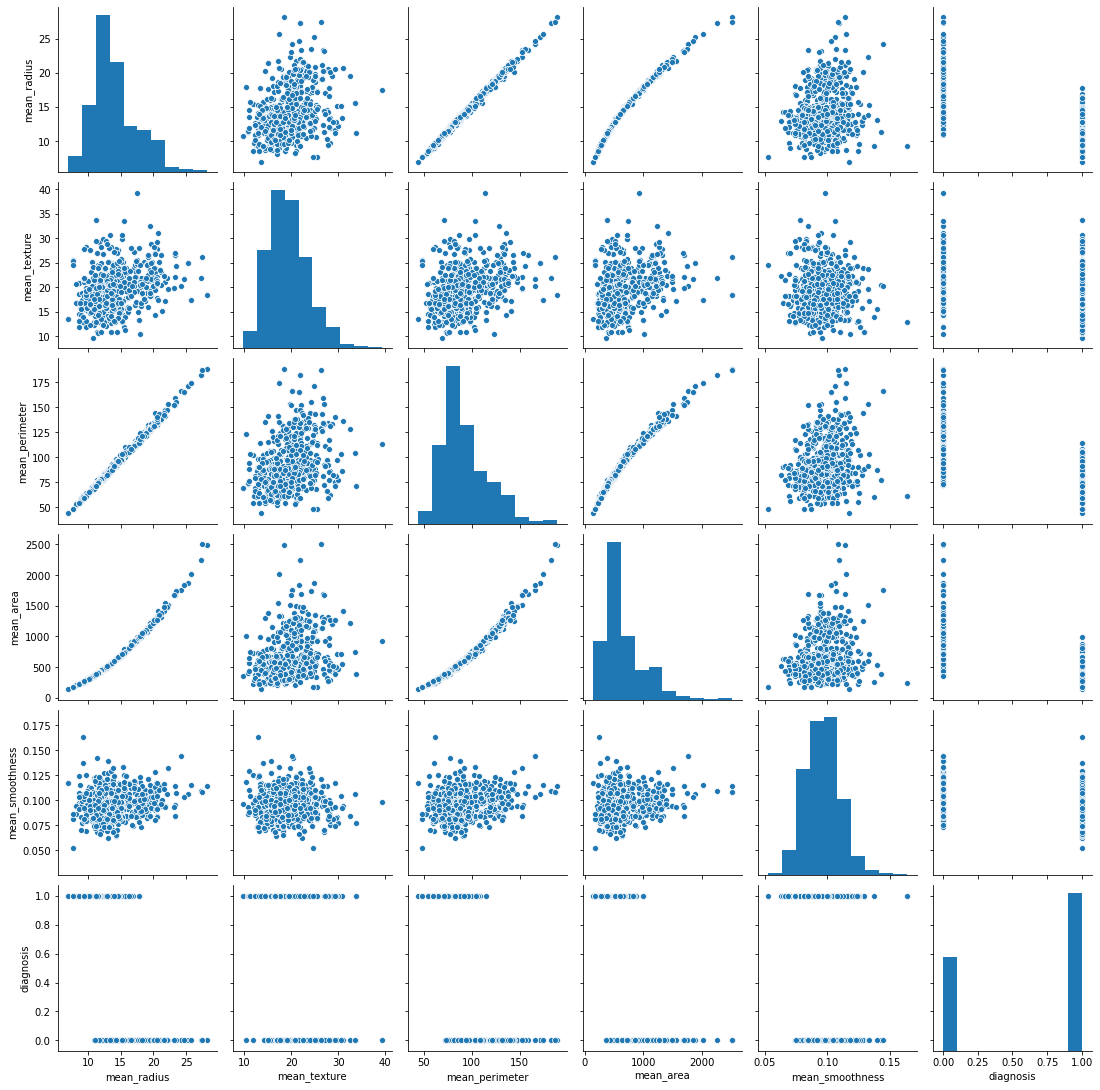

In [4]:
sns.pairplot(df)

In [5]:
df1=df.copy()
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

df1=df1[~((df1 < (Q1-1.5*IQR)) | (df1 > (Q3+1.5*IQR))).any(axis=1)]

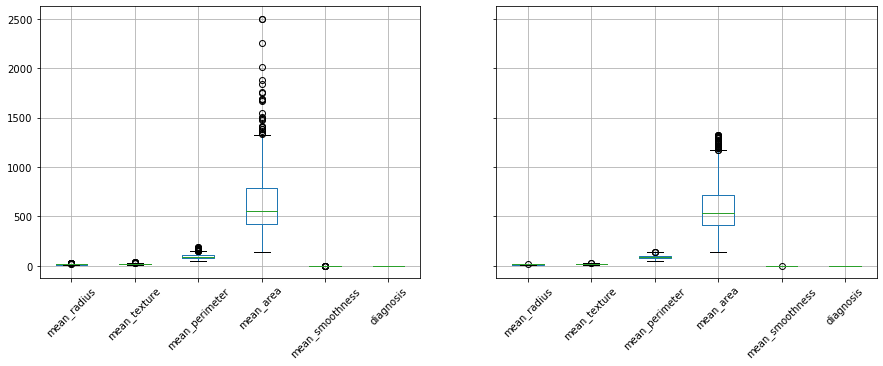

In [6]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5), sharey=True)
df.boxplot(rot=45,ax=ax1)
df1.boxplot(rot=45,ax=ax2)

In [7]:
print(df.shape) 
print(df1.shape)

(569, 6)
(533, 6)


In [8]:
from sklearn.model_selection import train_test_split

x = df1.drop(columns=['diagnosis']).values
y = df1.diagnosis.values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [9]:
print(x_train.shape) 
print(x_test.shape)
print(y_train.shape) 
print(y_test.shape)

(357, 5)
(176, 5)
(357,)
(176,)


# Task 3 Decision Tree Regression

Train DecisionTreeRegressor() model on your data. Use different max_depth parameter. Visualize Decision Tree.

In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import tree

In [11]:
dt0 = DecisionTreeRegressor()
gs = GridSearchCV(dt0, param_grid={'max_depth': list(range(1,10)),
                                   'criterion': ['mse', 'friedman_mse', 'mae'],
                                   'min_samples_leaf': list(range(1,10))})
gs.fit(x_train, y_train)

best_depth = gs.best_estimator_.max_depth
best_crit = gs.best_estimator_.criterion
best_leaf = gs.best_estimator_.min_samples_leaf
print (best_depth)
print (best_crit)
print (best_leaf)

8
mse
8


In [12]:
dt = DecisionTreeRegressor(max_depth=best_depth,criterion=best_crit,min_samples_leaf=best_leaf,min_samples_split=100)
dt.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=8, min_samples_split=100,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [13]:
y_pred = dt.predict(x_test)

[Text(1736.0, 2019.0857142857144, 'X[3] <= 694.15\nmse = 0.219\nsamples = 357\nvalue = 0.675'),
 Text(1488.0, 1708.457142857143, 'X[2] <= 85.175\nmse = 0.106\nsamples = 266\nvalue = 0.88'),
 Text(1240.0, 1397.8285714285716, 'X[4] <= 0.118\nmse = 0.036\nsamples = 185\nvalue = 0.962'),
 Text(992.0, 1087.2, 'X[4] <= 0.11\nmse = 0.022\nsamples = 177\nvalue = 0.977'),
 Text(744.0, 776.5714285714287, 'X[1] <= 22.345\nmse = 0.012\nsamples = 163\nvalue = 0.988'),
 Text(496.0, 465.9428571428573, 'X[4] <= 0.1\nmse = 0.007\nsamples = 145\nvalue = 0.993'),
 Text(248.0, 155.3142857142857, 'mse = 0.0\nsamples = 106\nvalue = 1.0'),
 Text(744.0, 155.3142857142857, 'mse = 0.025\nsamples = 39\nvalue = 0.974'),
 Text(992.0, 465.9428571428573, 'mse = 0.052\nsamples = 18\nvalue = 0.944'),
 Text(1240.0, 776.5714285714287, 'mse = 0.122\nsamples = 14\nvalue = 0.857'),
 Text(1488.0, 1087.2, 'mse = 0.234\nsamples = 8\nvalue = 0.625'),
 Text(1736.0, 1397.8285714285716, 'mse = 0.213\nsamples = 81\nvalue = 0.691')

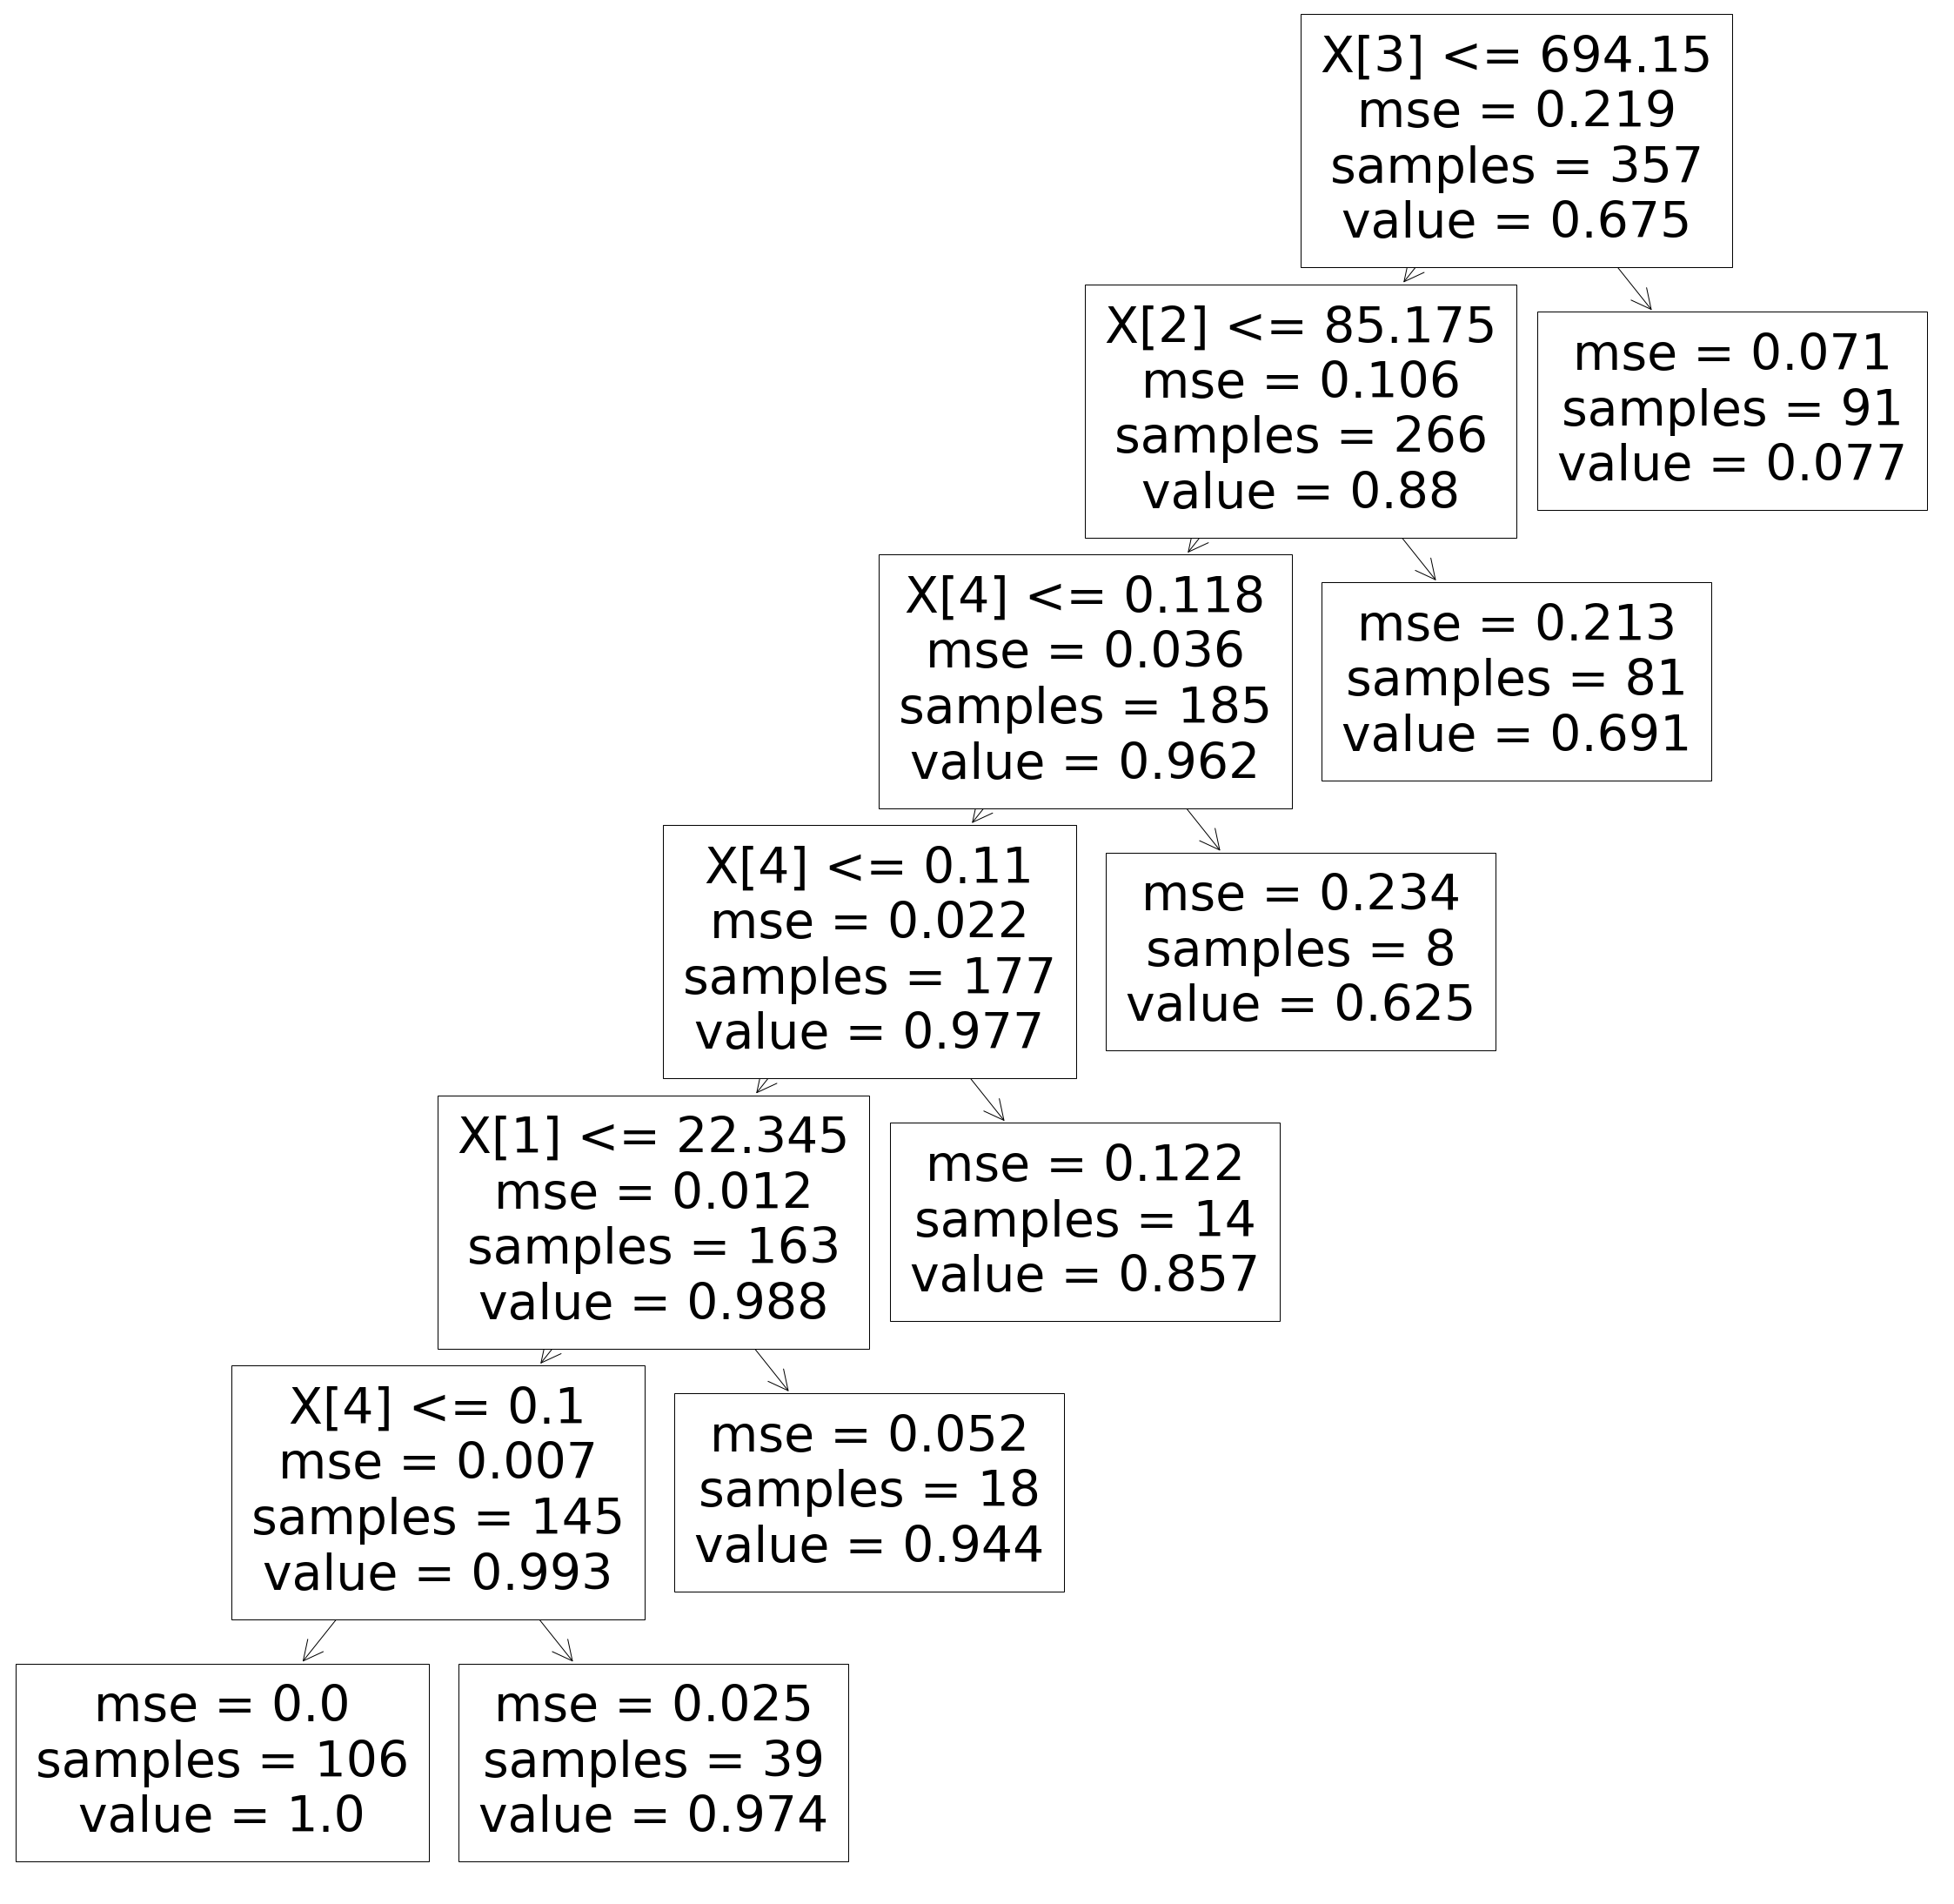

In [14]:
plt.figure(figsize=(40,40))  
tree.plot_tree(dt)

In [15]:
dt.score(x_train,y_train)

0.626429838973658

## Task 4 Random Forest Regression

Fit RandomForestRegressor() to the dataset. Make prediction.

In [16]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [18]:
y_rf_pred = rf.predict(x_test)

In [19]:
rf.score(x_train,y_train)

0.9595431499499214

In [20]:
print(np.round(y_pred).astype(int))

[1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1
 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1
 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 0
 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1
 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0]


In [21]:
print(np.round(y_rf_pred).astype(int))

[0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0
 1 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0
 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1
 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 0]


In [22]:
print(y_test)

[0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1
 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0
 1 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0
 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1
 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 0]


# Task 5 Metrics

Create a method print_metrics(), that prints the following metrics MAE (mean absolute error), MSE (mean squared error), MAPE (mean absolute percentage error), r2_score.

In [23]:
from sklearn import metrics

In [24]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [25]:
print("DecisionTree: {}\nRandomForest: {}\n"
      .format(
          metrics.r2_score(y_test,y_pred), 
          metrics.r2_score(y_test,y_rf_pred)))

DecisionTree: 0.6431473418077771
RandomForest: 0.7594373943173943



# Task 6 Conclusion

Analyze the work that you have done and make a conclusion. Make a short report on your work. 

In this lab we were supposed to use Decision Tree Regression and Random Forest Regression models. In order to find best parameters for DTR, we have used a GridSearch. As a result we have determined that Random Forset Regression is more precise.